In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
data = pd.read_csv('loan.csv')

C:\Users\khang\AppData\Local\Temp\ipykernel_6580\3601201394.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


In [88]:
# preivew data
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,NaN,Jan-15,171.62,May-16,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,117.08,Apr-13,119.66,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,NaN,Jun-14,649.91,May-16,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,NaN,Jan-15,357.48,Apr-16,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,NaN,May-16,67.79,May-16,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2822.969293,1213.88,2500.00,322.97,NaN,Jul-10,80.90,Jun-10,1,INDIVIDUAL
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,9913.491822,1020.51,8500.00,1413.49,NaN,Jul-10,281.94,Jul-10,1,INDIVIDUAL
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5272.161128,1397.12,5000.00,272.16,NaN,Apr-08,NaN,Jun-07,1,INDIVIDUAL
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5174.198551,672.66,5000.00,174.20,NaN,Jan-08,NaN,Jun-07,1,INDIVIDUAL


In [25]:
#checking the count of NaN values in column 
data.iloc[:,:].isna().sum() 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [40]:
# remove columns contain 90% NaN values
filter_col = pd.DataFrame(data.dropna(axis=1, thresh=len(data)*0.9)) 

In [41]:
# preview data for further cleaning
filter_col.head(100).style

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000000,36 months,10.65%,162.870000,B,B2,nan,10+ years,RENT,24000.000000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.650000,0,Jan-85,1,3,0,13648,83.70%,9,f,0.000000,0.000000,5863.155187,5833.840000,5000.000000,863.160000,0.000000,0.000000,0.000000,Jan-15,171.620000,May-16,0.000000,1,INDIVIDUAL,0,0.000000,0,0.000000,0.000000
1,1077430,1314167,2500,2500,2500.000000,60 months,15.27%,59.830000,C,C4,Ryder,< 1 year,RENT,30000.000000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.000000,0,Apr-99,5,3,0,1687,9.40%,4,f,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,Apr-13,119.660000,Sep-13,0.000000,1,INDIVIDUAL,0,0.000000,0,0.000000,0.000000
2,1077175,1313524,2400,2400,2400.000000,36 months,15.96%,84.330000,C,C5,nan,10+ years,RENT,12252.000000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.720000,0,Nov-01,2,2,0,2956,98.50%,10,f,0.000000,0.000000,3005.666844,3005.670000,2400.000000,605.670000,0.000000,0.000000,0.000000,Jun-14,649.910000,May-16,0.000000,1,INDIVIDUAL,0,0.000000,0,0.000000,0.000000
3,1076863,1277178,10000,10000,10000.000000,36 months,13.49%,339.310000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.000000,0,Feb-96,1,10,0,5598,21%,37,f,0.000000,0.000000,12231.890000,12231.890000,10000.000000,2214.920000,16.970000,0.000000,0.000000,Jan-15,357.480000,Apr-16,0.000000,1,INDIVIDUAL,0,0.000000,0,0.000000,0.000000
4,1075358,1311748,3000,3000,3000.000000,60 months,12.69%,67.790000,B,B5,University Medical Group,1 year,RENT,80000.000000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,Personal,972xx,OR,17.940000,0,Jan-96,0,15,0,27783,53.90%,38,f,524.060000,524.060000,3513.330000,3513.330000,2475.940000,1037.390000,0.000000,0.000000,0.000000,May-16,67.790000,May-16,0.000000,1,INDIVIDUAL,0,0.000000,0,0.000000,0.000000
5,1075269,1311441,5000,5000,5000.000000,36 months,7.90%,156.460000,A,A4,Veolia Transportaton,3 years,RENT,36000.000000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,wedding,My wedding loan I promise to pay back,852xx,AZ,11.200000,0,Nov-04,3,9,0,7963,28.30%,12,f,0.000000,0.000000,5632.210000,5632.210000,5000.000000,632.210000,0.000000,0.000000,0.000000,Jan-15,161.030000,Jan-16,0.000000,1,INDIVIDUAL,0,0.000000,0,0.000000,0.000000
6,1069639,1304742,7000,7000,7000.000000,60 months,15.96%,170.080000,C,C5,Southern Star Photography,8 years,RENT,47004.000000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1069639,debt_consolidation,Loan,280xx,NC,23.510000,0,Jul-05,1,7,0,17726,85.60%,11,f,0.000000,0.000000,10110.840000,10110.840000,6985.610000,3125.230000,0.000000,0.000000,0.000000,May-16,1313.760000,May-16,0.000000,1,INDIVIDUAL,0,0.000000,0,0.000000,0.000000
7,1072053,1288686,3000,3000,3000.000000,36 months,18.64%,109.430000,E,E1,MKC Accounting,9 years,RENT,48000.0000

In [46]:
# drop columns contain 90% of repeated values
filter_col.drop(columns=filter_col.columns[filter_col.eq(0).mean()>0.89], inplace=True)
filter_col.drop(columns=filter_col.columns[filter_col.eq(1).mean()>0.90], inplace=True)
filter_col.drop(columns=filter_col.columns[filter_col.eq('f').mean()>0.90], inplace=True)
filter_col.drop(columns=filter_col.columns[filter_col.eq('n').mean()>0.90], inplace=True)
filter_col.drop(columns=filter_col.columns[filter_col.eq('INDIVIDUAL').mean()>0.90], inplace=True)

In [47]:
# preivew data after cleaning
filter_col.head(100).style

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.000000,36 months,10.65%,162.870000,B,B2,nan,10+ years,RENT,24000.000000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.650000,Jan-85,1,3,13648,83.70%,9,5863.155187,5833.840000,5000.000000,863.160000,Jan-15,171.620000,May-16
1,1077430,1314167,2500,2500,2500.000000,60 months,15.27%,59.830000,C,C4,Ryder,< 1 year,RENT,30000.000000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.000000,Apr-99,5,3,1687,9.40%,4,1008.710000,1008.710000,456.460000,435.170000,Apr-13,119.660000,Sep-13
2,1077175,1313524,2400,2400,2400.000000,36 months,15.96%,84.330000,C,C5,nan,10+ years,RENT,12252.000000,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.720000,Nov-01,2,2,2956,98.50%,10,3005.666844,3005.670000,2400.000000,605.670000,Jun-14,649.910000,May-16
3,1076863,1277178,10000,10000,10000.000000,36 months,13.49%,339.310000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000000,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.000000,Feb-96,1,10,5598,21%,37,12231.890000,12231.890000,10000.000000,2214.920000,Jan-15,357.480000,Apr-16
4,1075358,1311748,3000,3000,3000.000000,60 months,12.69%,67.790000,B,B5,University Medical Group,1 year,RENT,80000.000000,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,Personal,972xx,OR,17.940000,Jan-96,0,15,27783,53.90%,38,3513.330000,3513.330000,2475.940000,1037.390000,May-16,67.790000,May-16
5,1075269,1311441,5000,5000,5000.000000,36 months,7.90%,156.460000,A,A4,Veolia Transportaton,3 years,RENT,36000.000000,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1075269,wedding,My wedding loan I promise to pay back,852xx,AZ,11.200000,Nov-04,3,9,7963,28.30%,12,5632.210000,5632.210000,5000.000000,632.210000,Jan-15,161.030000,Jan-16
6,1069639,1304742,7000,7000,7000.000000,60 months,15.96%,170.080000,C,C5,Southern Star Photography,8 years,RENT,47004.000000,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1069639,debt_consolidation,Loan,280xx,NC,23.510000,Jul-05,1,7,17726,85.60%,11,10110.840000,10110.840000,6985.610000,3125.230000,May-16,1313.760000,May-16
7,1072053,1288686,3000,3000,3000.000000,36 months,18.64%,109.430000,E,E1,MKC Accounting,9 years,RENT,48000.000000,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=1072053,car,Car Downpayment,900xx,CA,5.350000,Jan-07,2,4,8221,87.50%,4,3939.135294,3939.140000,3000.000000,939.140000,Jan-15,111.340000,Dec-14
8,1071795,1306957,5600,5600,5600.000000,60 months,21.28%,152.390000,F,F2,nan,4 years,OWN,40000.000000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=1071795,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.550000,Apr-04,2,11,5210,32.60%,13,646.020000,646.020000,162.020000,294.940000,Apr-12,152.390000,Aug-12
9,1071570,1306721,5375,5375,5350.000000,60 months,12.69%,121.450000,B,B5,Starbucks,< 1 year,RENT,15000.000000,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.action?loan_id=1071570,other,Building my credit history.,774xx,TX,18.080000,Sep-04,0,2,9279,36.50%,3,1476.190000,1469.340000,673.480000,533.420000,Nov-12,121.450000,Mar-13


In [40]:
data.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [41]:
data.home_ownership.value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [42]:
data.verification_status.value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [43]:
cn = data.loan_status.value_counts()

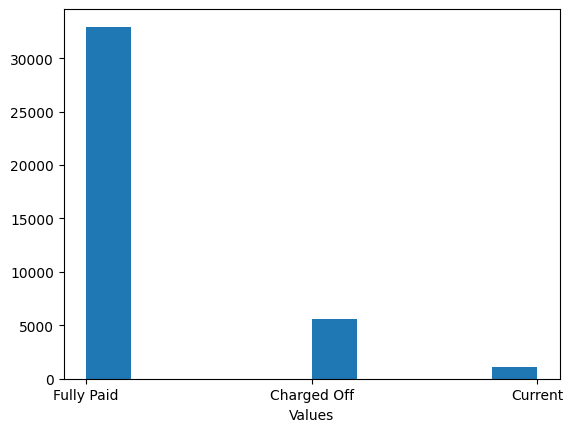

In [44]:
import matplotlib.pyplot as plt


plt.hist(data['loan_status'], bins=10)  
plt.xlabel('Values')
plt.show()

In [46]:
missing_values = (data.isnull().sum() / len(data)).sort_values(ascending=False)

In [47]:
missing_values

out_prncp_inv              0.971297
out_prncp                  0.971297
pub_rec_bankruptcies       0.957676
total_rec_late_fee         0.948486
pub_rec                    0.946723
collection_recovery_fee    0.904776
recoveries                 0.893799
delinq_2yrs                0.891432
inq_last_6mths             0.485938
emp_title                  0.061913
emp_length                 0.027066
revol_bal                  0.025027
dti                        0.004608
total_pymnt_inv            0.004154
funded_amnt_inv            0.003248
last_pymnt_amnt            0.001863
total_rec_prncp            0.001863
total_rec_int              0.001788
last_pymnt_d               0.001788
revol_util                 0.001259
total_pymnt                0.000403
title                      0.000277
last_credit_pull_d         0.000050
initial_list_status        0.000000
funded_amnt                0.000000
loan_amnt                  0.000000
policy_code                0.000000
term                       0

In [48]:
missing_values*100

out_prncp_inv              97.129693
out_prncp                  97.129693
pub_rec_bankruptcies       95.767555
total_rec_late_fee         94.848554
pub_rec                    94.672307
collection_recovery_fee    90.477629
recoveries                 89.379863
delinq_2yrs                89.143188
inq_last_6mths             48.593801
emp_title                   6.191303
emp_length                  2.706650
revol_bal                   2.502707
dti                         0.460760
total_pymnt_inv             0.415439
funded_amnt_inv             0.324798
last_pymnt_amnt             0.186318
total_rec_prncp             0.186318
total_rec_int               0.178765
last_pymnt_d                0.178765
revol_util                  0.125891
total_pymnt                 0.040285
title                       0.027696
last_credit_pull_d          0.005036
initial_list_status         0.000000
funded_amnt                 0.000000
loan_amnt                   0.000000
policy_code                 0.000000
t

In [49]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,NaN,NaN,NaN,Jan-15,171.62,May-16,1,INDIVIDUAL,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,NaN,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,NaN,NaN,NaN,Jun-14,649.91,May-16,1,INDIVIDUAL,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,NaN,NaN,Jan-15,357.48,Apr-16,1,INDIVIDUAL,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,NaN,NaN,NaN,May-16,67.79,May-16,1,INDIVIDUAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,322.97,NaN,NaN,NaN,Jul-10,80.90,Jun-10,1,INDIVIDUAL,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1413.49,NaN,NaN,NaN,Jul-10,281.94,Jul-10,1,INDIVIDUAL,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,272.16,NaN,NaN,NaN,Apr-08,NaN,Jun-07,1,INDIVIDUAL,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,174.20,NaN,NaN,NaN,Jan-08,NaN,Jun-07,1,INDIVIDUAL,NaN


In [50]:
columns_to_remove = missing_values[missing_values > 0.9].index.tolist()

In [51]:
columns_to_remove

['out_prncp_inv',
 'out_prncp',
 'pub_rec_bankruptcies',
 'total_rec_late_fee',
 'pub_rec',
 'collection_recovery_fee']

In [52]:
data = data.drop(columns=columns_to_remove)

In [53]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,NaN,Jan-15,171.62,May-16,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,117.08,Apr-13,119.66,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,NaN,Jun-14,649.91,May-16,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,NaN,Jan-15,357.48,Apr-16,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,NaN,May-16,67.79,May-16,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2822.969293,1213.88,2500.00,322.97,NaN,Jul-10,80.90,Jun-10,1,INDIVIDUAL
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,9913.491822,1020.51,8500.00,1413.49,NaN,Jul-10,281.94,Jul-10,1,INDIVIDUAL
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5272.161128,1397.12,5000.00,272.16,NaN,Apr-08,NaN,Jun-07,1,INDIVIDUAL
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5174.198551,672.66,5000.00,174.20,NaN,Jan-08,NaN,Jun-07,1,INDIVIDUAL
